# Funcionamiento de YOLO (You Only Look Once)



YOLO ("You Only Look Once") es una familia de algoritmos de visión por computadora diseñados para la detección de objetos en imágenes y videos en tiempo real. A diferencia de otros métodos de detección, YOLO procesa la imagen completa en una sola pasada por la red neuronal, logrando alta precisión y velocidad. Esta capacidad la hace ideal para aplicaciones como vigilancia, robótica, conducción autónoma y más.

###Principios Básicos

1. División de la Imagen

YOLO divide la imagen de entrada en una cuadrícula de celdas. Cada celda es responsable de predecir:

La presencia de un objeto dentro de su área.

Las coordenadas del objeto (si existe).

La clase del objeto detectado.

2. Predicciones Simultáneas

Cada celda produce un conjunto de predicciones que incluye:

Bounding boxes: Coordenadas para las cajas delimitadoras.

Confianza: Qué tan probable es que la caja contenga un objeto.

Clases: Probabilidades de pertenencia a cada clase.



Arquitectura de YOLO

YOLO utiliza una red neuronal convolucional (CNN) optimizada para realizar detección de objetos. Aquí están los componentes clave:

1. Backbone

El backbone es una CNN preentrenada, como Darknet, que extrae características importantes de la imagen. En las versiones más recientes, como YOLOv5 y YOLOv8, se han adoptado arquitecturas más ligeras y rápidas.

2. Cabeza de Predicción

Se encarga de generar las predicciones finales basadas en las características extraídas. Incluye:

Coordenadas de las bounding boxes.

Confianza para cada predicción.

Distribuciones de probabilidad para cada clase.



Proceso de Detección

Entrada: Una imagen de tamaño fijo (e.g., 640x640).

Extracción de Características: El backbone analiza la imagen y extrae características relevantes.

Predicciones Iniciales: Se generan múltiples predicciones para cada celda de la cuadrícula.

Filtrado de Predicciones:

Se aplica un umbral de confianza para descartar predicciones irrelevantes.

Se utiliza la supresión no máxima (NMS) para eliminar cajas redundantes.

Salida: Coordenadas de bounding boxes, etiquetas de clase y puntajes de confianza.

Ventajas y Desventajas

Ventajas

Velocidad: Ideal para aplicaciones en tiempo real.

Simplicidad: Todo el proceso se realiza en una sola pasada.

Alta Precisión: Especialmente para objetos grandes.

Desventajas

Dificultad con Objetos Pequeños: La cuadrícula puede no capturar bien detalles pequeños.

Sensibilidad a la Resolución: Requiere imágenes de entrada de tamaño específico.

Versiones de YOLO

1. YOLOv1

Introdujo el enfoque "You Only Look Once".

Limitado en precisión debido a la simplicidad de su arquitectura.

2. YOLOv2 y YOLOv3

Mejoras en la arquitectura y uso de anclas para mejorar la detección de objetos pequeños.

3. YOLOv4

Introdujo técnicas modernas como Mish Activation y CSPDarknet.

4. YOLOv5

Enfocado en la facilidad de uso y soporte extensivo para frameworks como PyTorch.

5. YOLOv8

Última versión con un enfoque más modular, multitarea (detección, segmentación, clasificación) y soporte nativo para exportación a formatos como ONNX y TensorRT.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Instalación
Para instalar Yolov8, se recomienda usar el gestor de paquetes `pip`:
```bash
pip install ultralytics
```

**EJEMPLO CON DETECCIÓN DE BACHES CON YOLO**

In [ ]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


##Propósito General

Descarga un conjunto de datos desde Roboflow.
Configura un modelo YOLOv8 preentrenado.
Entrena el modelo con las imágenes y etiquetas del dataset.
Genera estadísticas y gráficos del entrenamiento.

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="UxLDjCaHtQ6lZ8DBIDQo")
project = rf.workspace("projects-hjaax").project("pothole-detection-using-yolov5")
version = project.version(1)
dataset = version.download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pothole-detection-using-YOLOv5-1 in yolov8:: 100%|██████████| 1342/1342 [00:00<00:00, 5892.18it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=45 imgsz=640 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 201MB/s]
New https://pypi.org/project/ultralytics/8.3.37 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Pothole-detection-using-YOLOv5-1/data.yaml, epochs=45, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, a

In [ ]:
!ls {HOME}/runs/detect/train

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1732577377.ba6491b00085.3336.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1050.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1051.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1052.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


In [ ]:

print(HOME)

# Download the detect folder after training
!zip -r detect.zip {HOME}/runs/detect/train

print("detect folder zipped as detect.zip")


/content
updating: content/runs/detect/train/ (stored 0%)
updating: content/runs/detect/train/train_batch1050.jpg (deflated 4%)
updating: content/runs/detect/train/train_batch0.jpg (deflated 1%)
updating: content/runs/detect/train/events.out.tfevents.1732577377.ba6491b00085.3336.0 (deflated 90%)
updating: content/runs/detect/train/PR_curve.png (deflated 19%)
updating: content/runs/detect/train/train_batch2.jpg (deflated 1%)
updating: content/runs/detect/train/val_batch0_labels.jpg (deflated 5%)
updating: content/runs/detect/train/weights/ (stored 0%)
updating: content/runs/detect/train/weights/best.pt (deflated 8%)
updating: content/runs/detect/train/weights/last.pt (deflated 8%)
updating: content/runs/detect/train/R_curve.png (deflated 16%)
updating: content/runs/detect/train/train_batch1052.jpg (deflated 7%)
updating: content/runs/detect/train/val_batch2_labels.jpg (deflated 6%)
updating: content/runs/detect/train/labels.jpg (deflated 30%)
updating: content/runs/detect/train/results.

/content


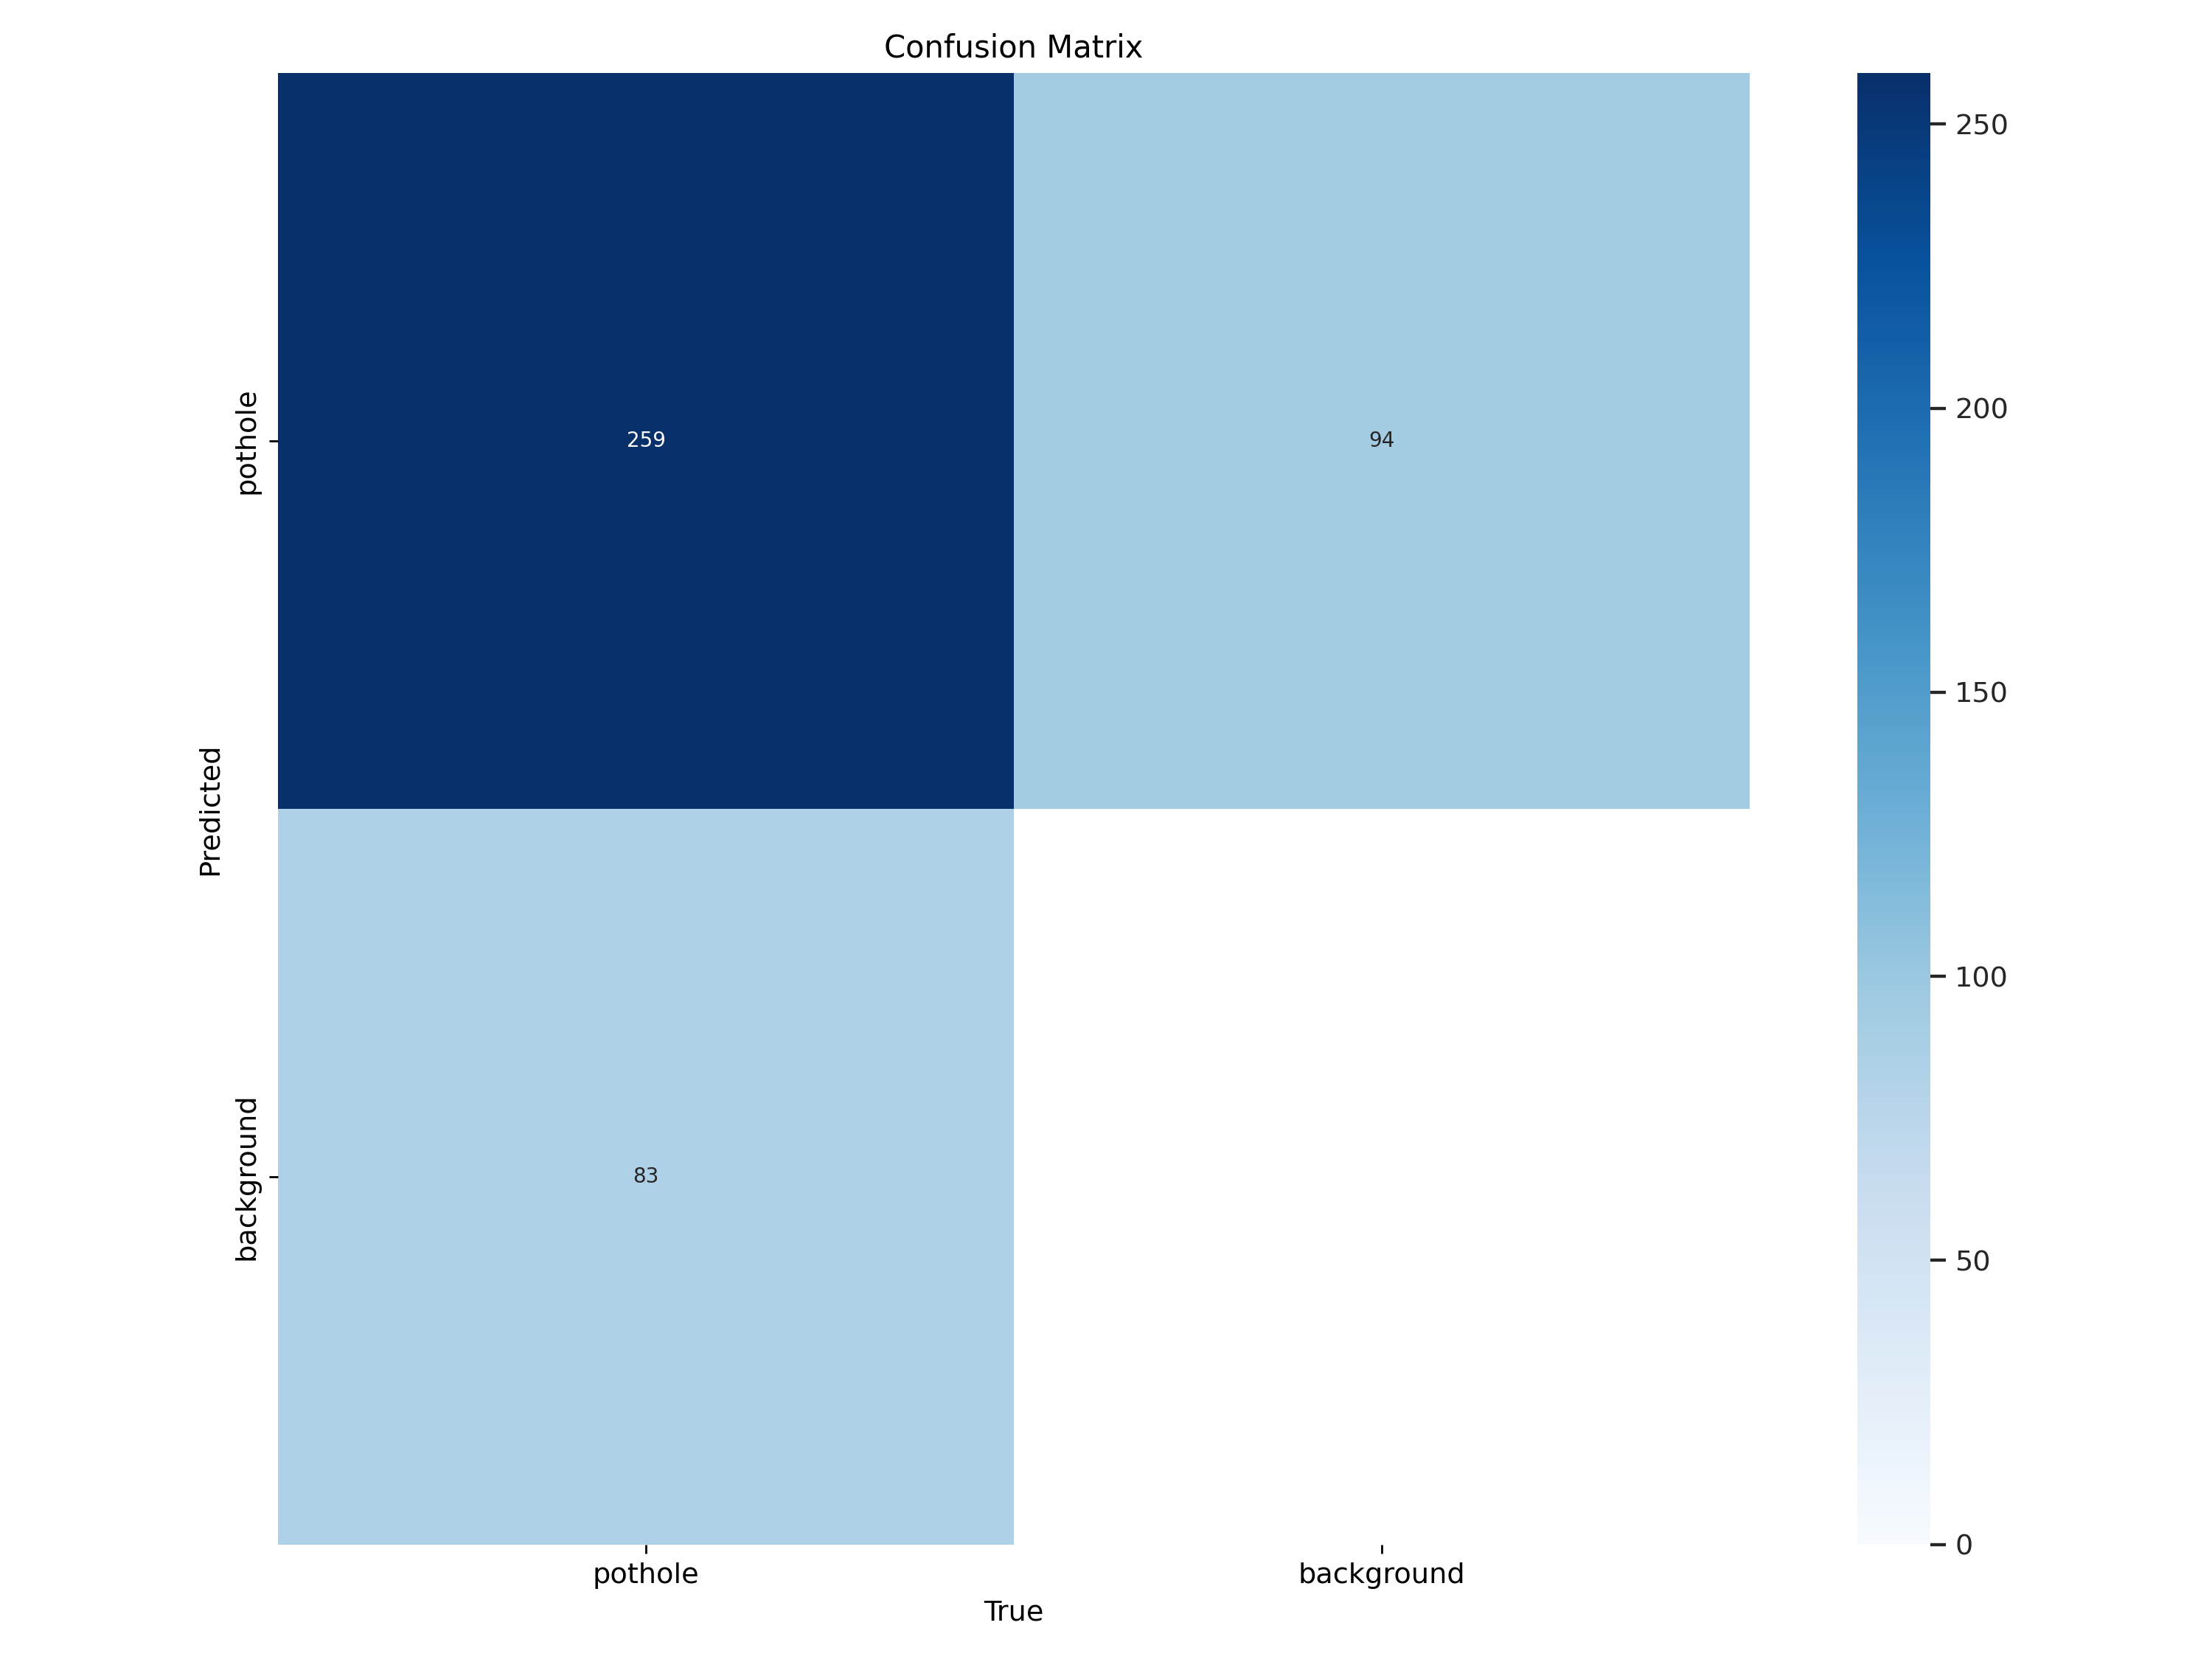

In [ ]:
#Matriz de confusion

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


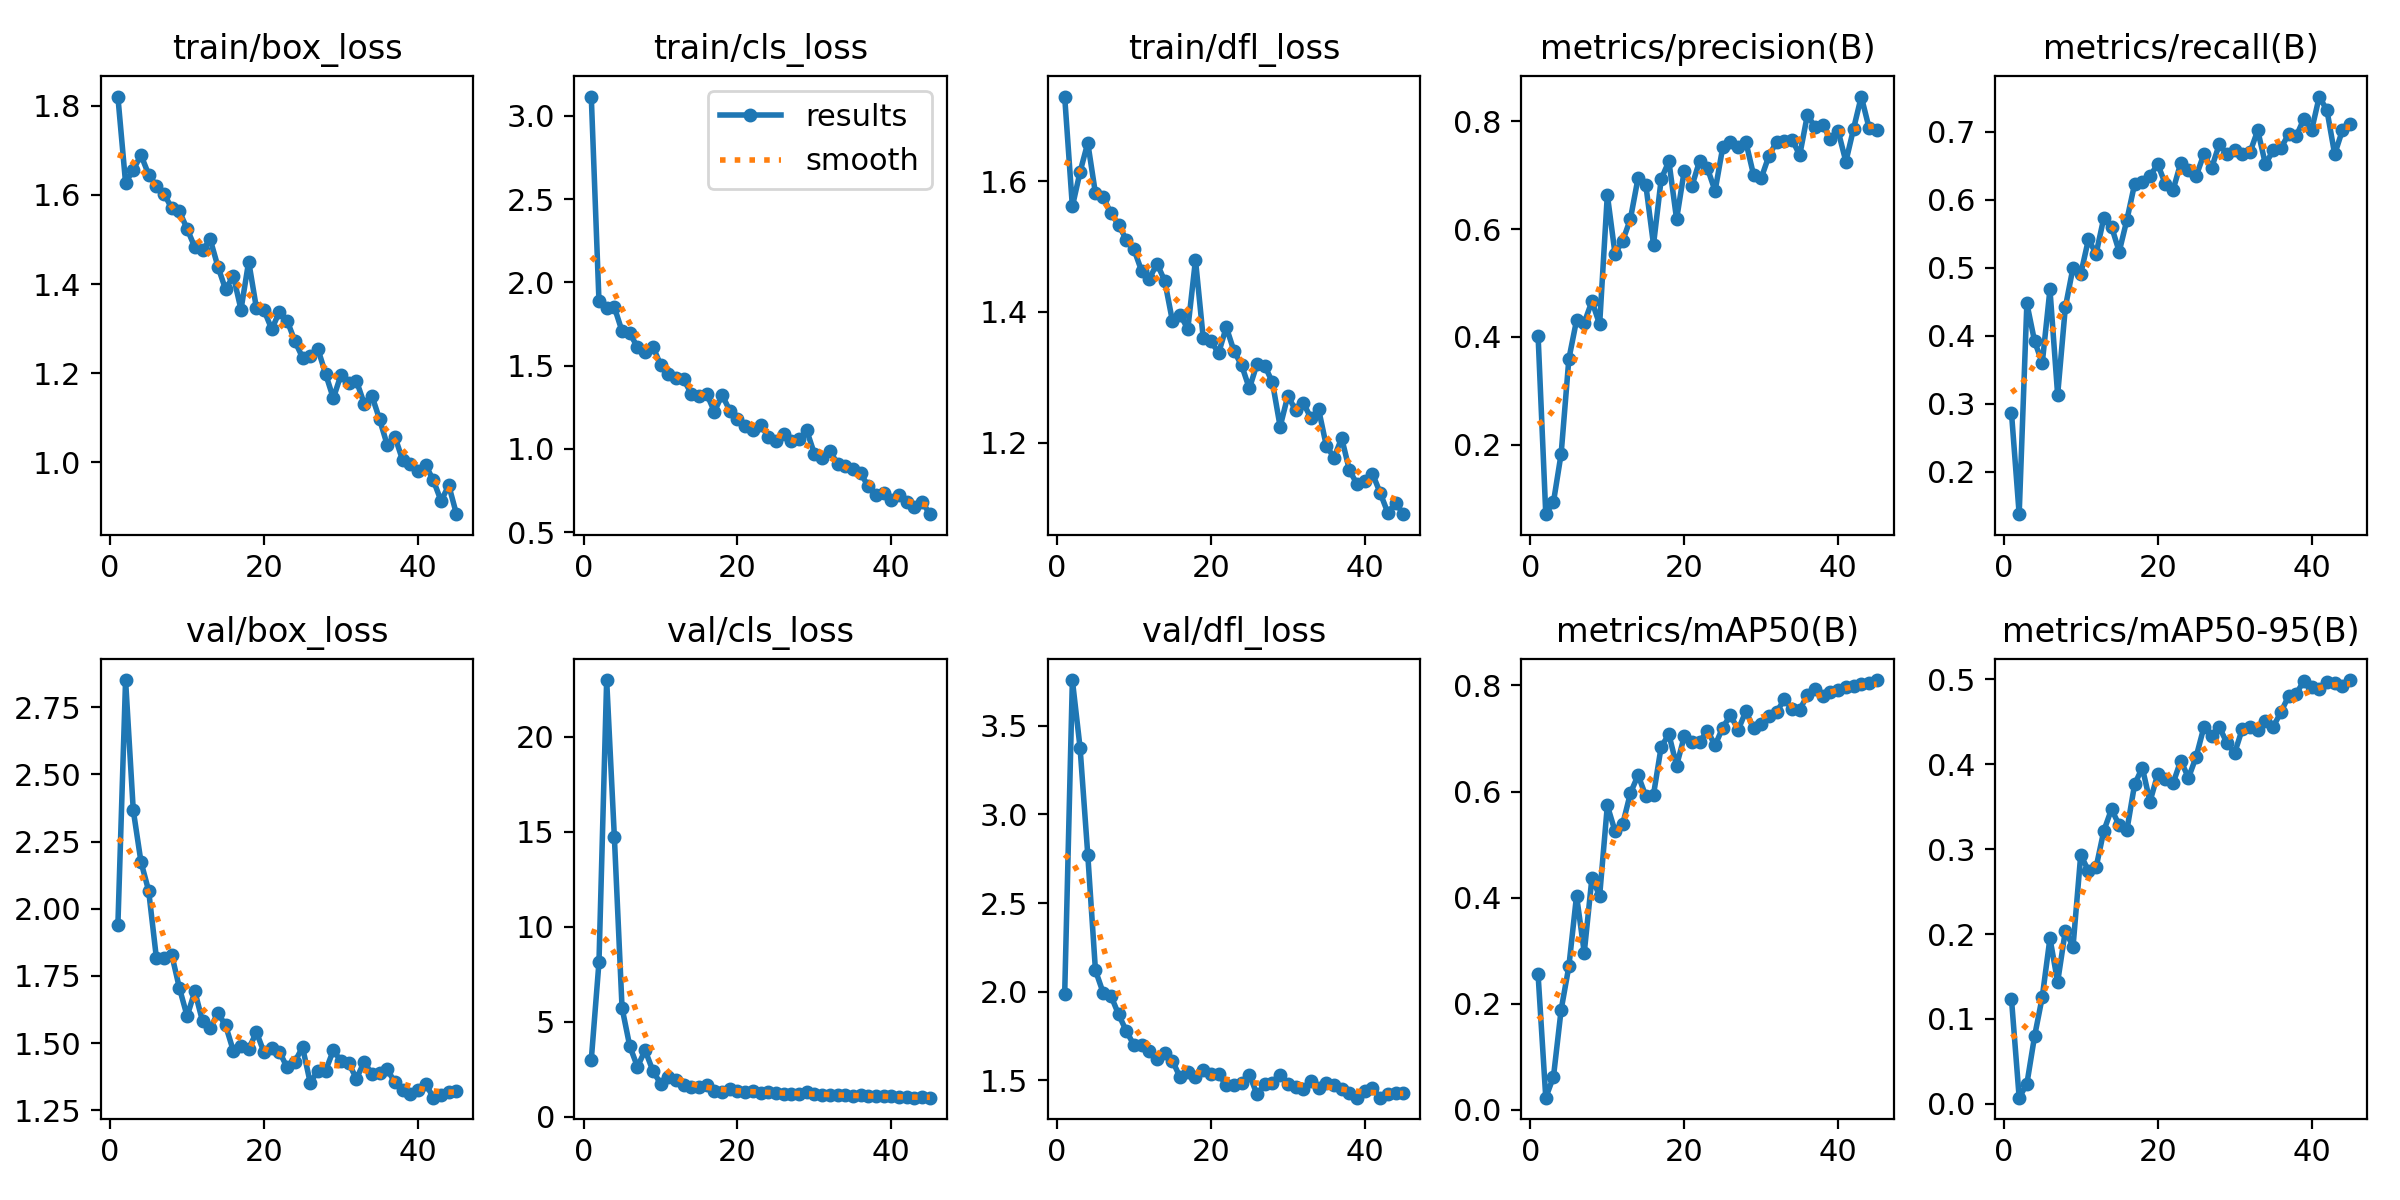

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


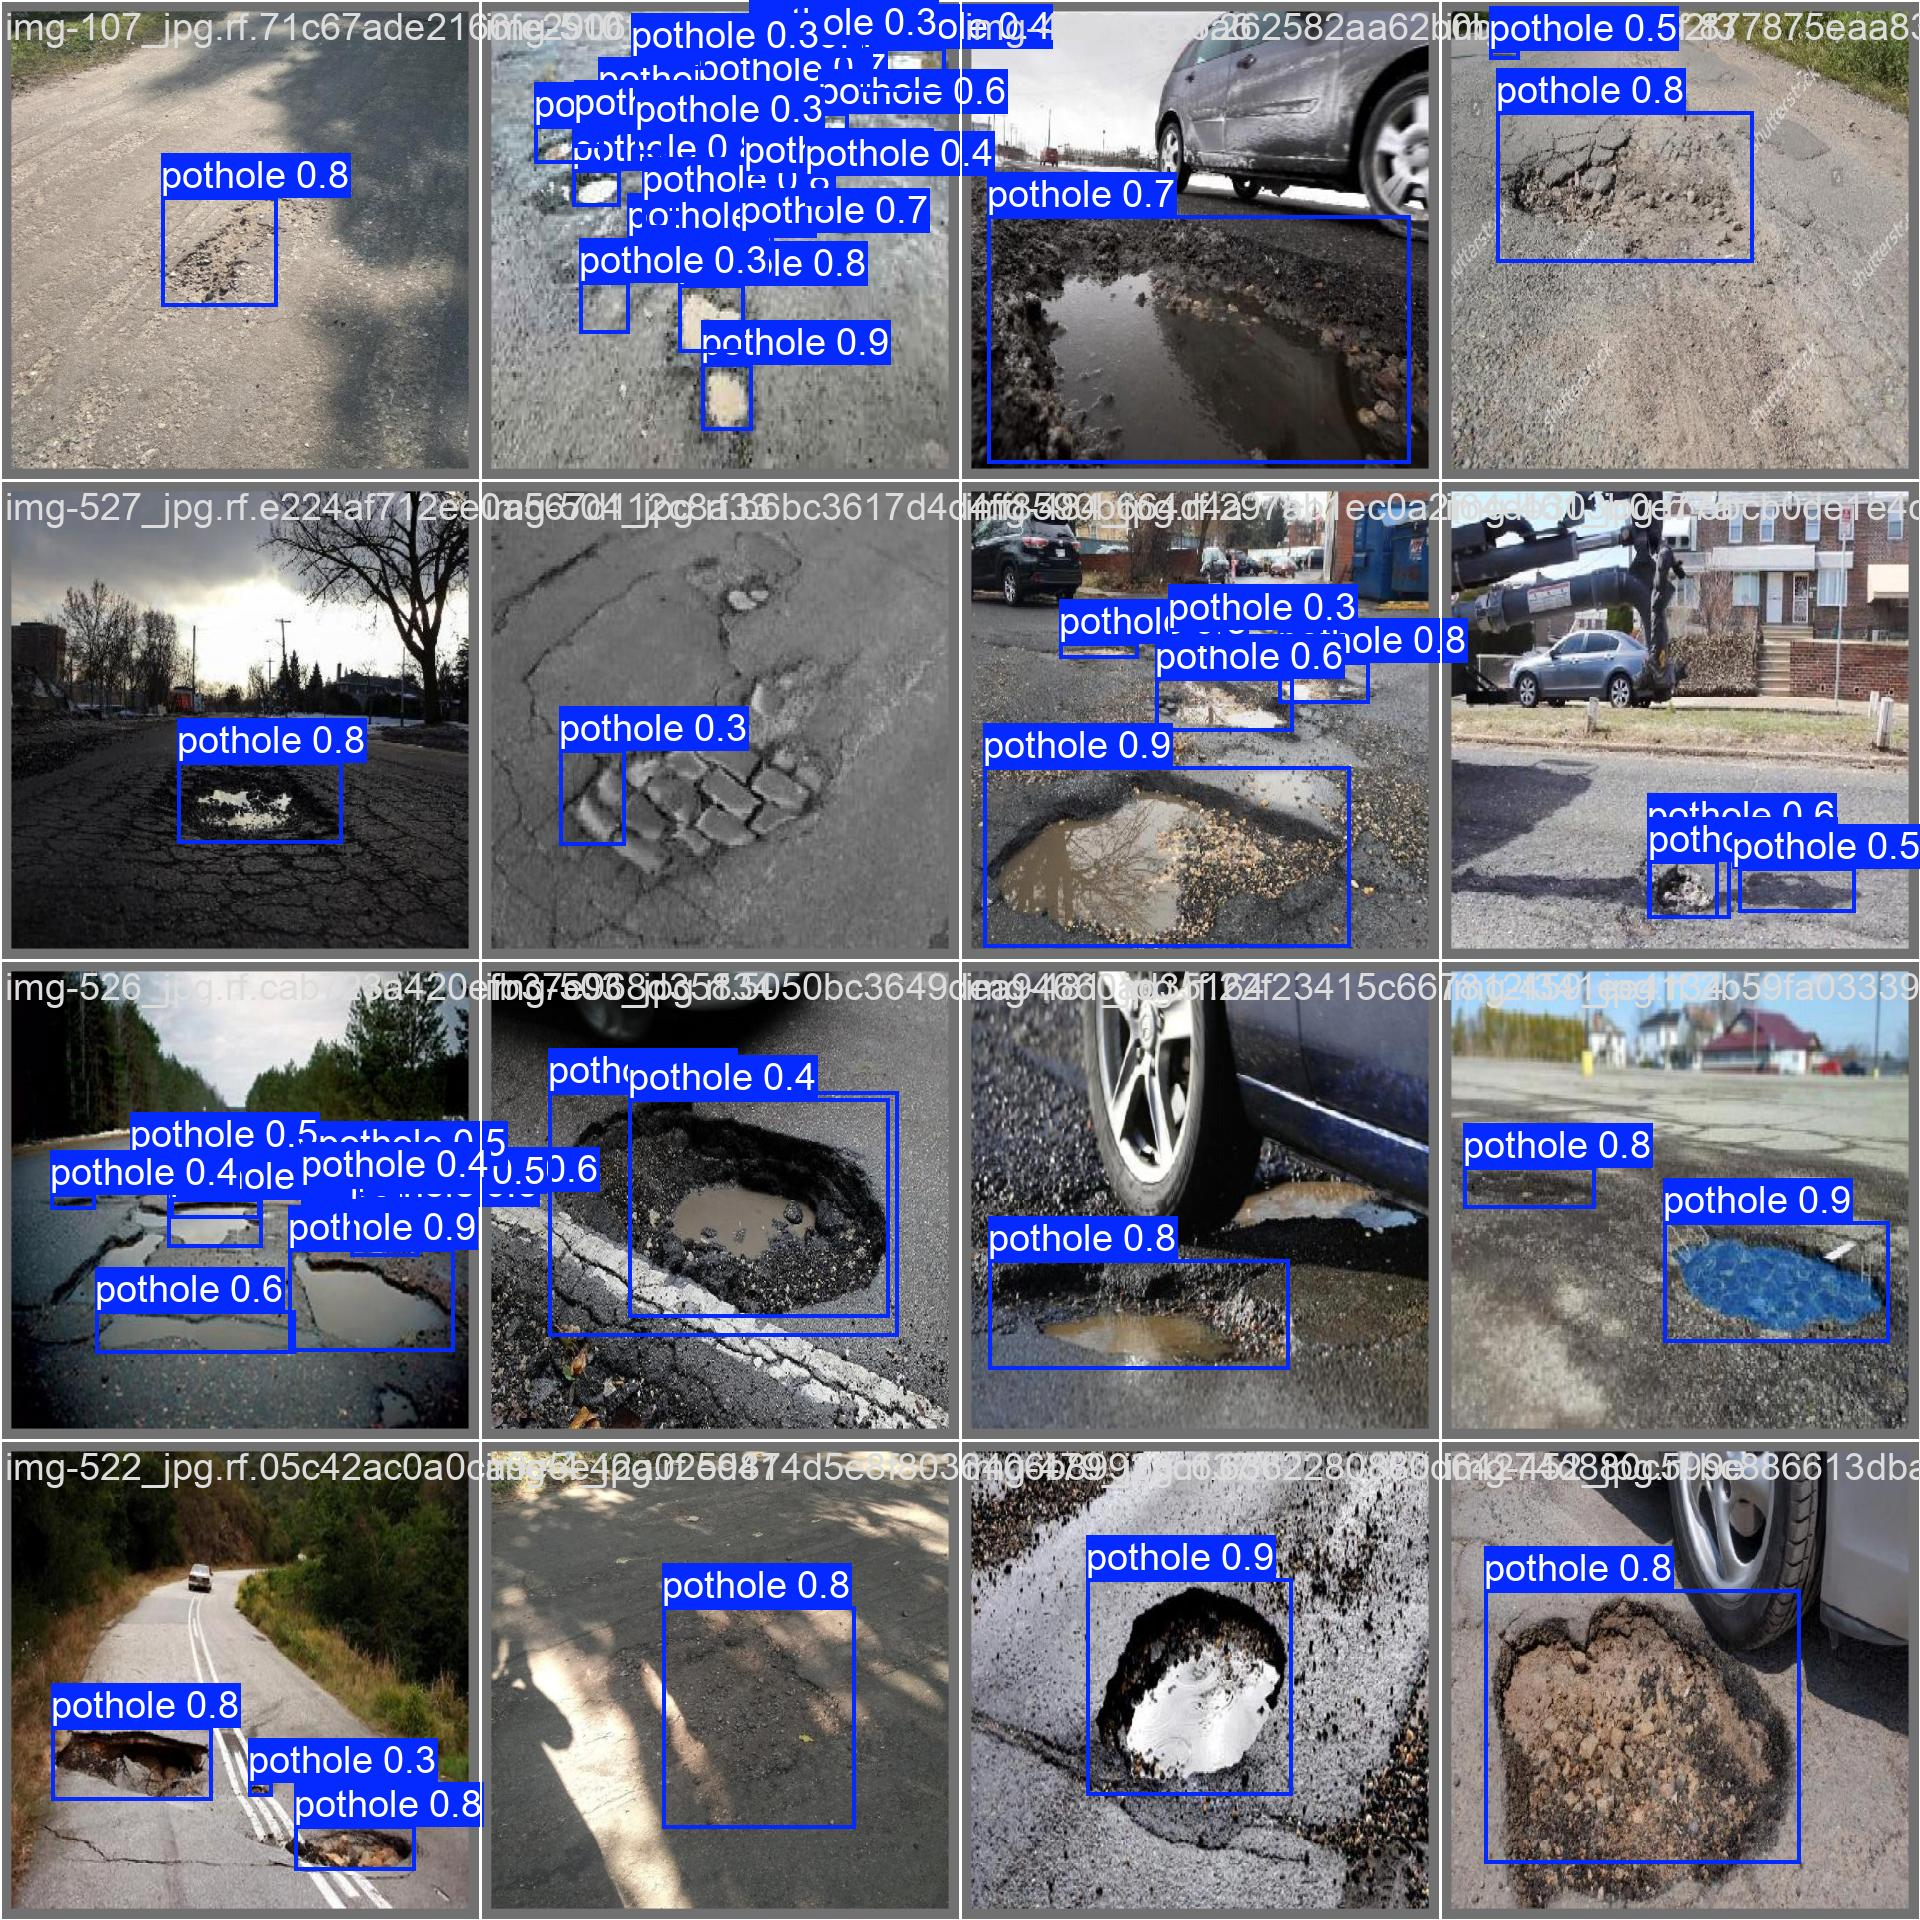

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
#Validar modelo

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Pothole-detection-using-YOLOv5-1/valid/labels.cache... 133 images, 0 backgrounds, 0 corrupt: 100% 133/133 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:06<00:00,  1.29it/s]
                   all        133        342      0.789      0.713      0.812      0.499
Speed: 3.3ms preprocess, 16.6ms inference, 0.0ms loss, 13.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
# Download the detect folder after train
!zip -r detect.zip {HOME}/runs/detect/val

print("detect folder zipped as detect.zip")


updating: content/runs/detect/val/ (stored 0%)
updating: content/runs/detect/val/PR_curve.png (deflated 19%)
updating: content/runs/detect/val/val_batch0_labels.jpg (deflated 5%)
updating: content/runs/detect/val/R_curve.png (deflated 16%)
updating: content/runs/detect/val/val_batch2_labels.jpg (deflated 5%)
updating: content/runs/detect/val/val_batch1_pred.jpg (deflated 4%)
updating: content/runs/detect/val/confusion_matrix.png (deflated 38%)
updating: content/runs/detect/val/val_batch1_labels.jpg (deflated 4%)
updating: content/runs/detect/val/P_curve.png (deflated 17%)
updating: content/runs/detect/val/val_batch2_pred.jpg (deflated 5%)
updating: content/runs/detect/val/confusion_matrix_normalized.png (deflated 37%)
updating: content/runs/detect/val/F1_curve.png (deflated 17%)
updating: content/runs/detect/val/val_batch0_pred.jpg (deflated 5%)
detect folder zipped as detect.zip


In [ ]:
#Inferencia con el modelo
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/67 /content/datasets/Pothole-detection-using-YOLOv5-1/test/images/img-106_jpg.rf.a6cb5366859b4d5c9d1fcc0af6a5c1b5.jpg: 640x640 2 potholes, 16.3ms
image 2/67 /content/datasets/Pothole-detection-using-YOLOv5-1/test/images/img-124_jpg.rf.a00e6351da1cb6f622a39ef36657c540.jpg: 640x640 6 potholes, 16.2ms
image 3/67 /content/datasets/Pothole-detection-using-YOLOv5-1/test/images/img-146_jpg.rf.ca0dcb84640b60cd337dde07d3e1db32.jpg: 640x640 2 potholes, 16.2ms
image 4/67 /content/datasets/Pothole-detection-using-YOLOv5-1/test/images/img-171_jpg.rf.6f5f59b8fcf9edfa5760e0abb22dcb81.jpg: 640x640 1 pothole, 16.2ms
image 5/67 /content/datasets/Pothole-detection-using-YOLOv5-1/test/images/img-175_jpg.rf.59795b56b181b1977ccd6e2b5be20a8d.jpg: 640x640 3 potholes, 16.2ms
image 6/67 /content/datasets/Pothole-detection-usi

In [ ]:
# Download the detect folder after predict
!zip -r detect.zip {HOME}/runs/detect/predict


updating: content/runs/detect/predict/ (stored 0%)
updating: content/runs/detect/predict/img-282_jpg.rf.82edd149e9ce66ff5261464d7481ba04.jpg (deflated 4%)
updating: content/runs/detect/predict/img-124_jpg.rf.a00e6351da1cb6f622a39ef36657c540.jpg (deflated 4%)
updating: content/runs/detect/predict/img-595_jpg.rf.43d6b03258d57634b2ad8d7c0ca0e388.jpg (deflated 3%)
updating: content/runs/detect/predict/img-629_jpg.rf.ce3ae1c2d033748e210fef925a34c553.jpg (deflated 8%)
updating: content/runs/detect/predict/img-405_jpg.rf.88ff6e1c139b3181edcd0475c11f1024.jpg (deflated 3%)
updating: content/runs/detect/predict/img-182_jpg.rf.76bf7f073bec0c4ad551d689a6918102.jpg (deflated 5%)
updating: content/runs/detect/predict/img-266_jpg.rf.f93108322ce65e5576bc4998083c6c96.jpg (deflated 5%)
updating: content/runs/detect/predict/img-586_jpg.rf.dfa9954b46338f3e20e15f9cad275fb9.jpg (deflated 4%)
updating: content/runs/detect/predict/img-584_jpg.rf.d4e6e3d58c8c914dfb9d2e766cb14b10.jpg (deflated 5%)
updating: con

In [ ]:
#Descargamos el modelo que mandaremos a produccion
from google.colab import files

# Download the best.pt model file
files.download(f'{HOME}/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>